In [1]:
# Importing the necessary libraries

import numpy as np     # For mathematical operations
import pandas as pd    # For data manipulation
from bs4 import BeautifulSoup  # For webscraping
import requests  # For making request from webserver
import re        # For data cleaning

In [2]:
# Getting the url of the web page

# Getting 1 page of the website
url="https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_winning_players#cite_note-3"

# Making requests using get method
req=requests.get(url)
req

# The status code is 200, thereby we can proceed

<Response [200]>

# Web Scraping

In [3]:
# Web scraping the data using beautiful soup

data=BeautifulSoup(req.content)
data

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of FIFA World Cup winning players - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-wid

In [4]:
# Making it look better using prettify function

data.prettify()

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of FIFA World Cup winning players - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled

In [5]:
# Identifying the useful data out of all data

# Since relevant data is in between <th> tags
# Using findAll function
for i in data.findAll('th'):
    print(i)

<th rowspan="2" scope="col">Player
</th>
<th rowspan="2" scope="col">Team
</th>
<th colspan="2" scope="col">Titles won
</th>
<th rowspan="2" scope="col">Other appearances
</th>
<th class="unsortable" rowspan="2" scope="col">Profile
</th>
<th rowspan="2">Birth
</th>
<th rowspan="2">Death
</th>
<th scope="col">Number
</th>
<th scope="col">Years
</th>
<th data-sort-value="Pele" scope="row"><a href="/wiki/Pel%C3%A9" title="Pelé">Pelé</a>
</th>
<th scope="row"><b><a href="/wiki/1958_FIFA_World_Cup" title="1958 FIFA World Cup">1958</a></b>, <a href="/wiki/1962_FIFA_World_Cup" title="1962 FIFA World Cup">1962</a>, <b><a href="/wiki/1970_FIFA_World_Cup" title="1970 FIFA World Cup">1970</a></b>
</th>
<th data-sort-value="Bellini" scope="row"><a href="/wiki/Hilderaldo_Bellini" title="Hilderaldo Bellini">Bellini</a>
</th>
<th scope="row"><b><a href="/wiki/1958_FIFA_World_Cup" title="1958 FIFA World Cup">1958</a></b>, <i><a href="/wiki/1962_FIFA_World_Cup" title="1962 FIFA World Cup">1962</a></i>


In [6]:
# Aim is to create a dataframe with:
# Name of player
# Team
# Number of titles won
# Year of title won
# Year of match lost
# Birth year 
# Death year

In [6]:
# Converting the above data into string and putting in a list

arr=[]
for i in data.findAll('th'):
    arr.append(str(i))

arr

['<th rowspan="2" scope="col">Player\n</th>',
 '<th rowspan="2" scope="col">Team\n</th>',
 '<th colspan="2" scope="col">Titles won\n</th>',
 '<th rowspan="2" scope="col">Other appearances\n</th>',
 '<th class="unsortable" rowspan="2" scope="col">Profile\n</th>',
 '<th rowspan="2">Birth\n</th>',
 '<th rowspan="2">Death\n</th>',
 '<th scope="col">Number\n</th>',
 '<th scope="col">Years\n</th>',
 '<th data-sort-value="Pele" scope="row"><a href="/wiki/Pel%C3%A9" title="Pelé">Pelé</a>\n</th>',
 '<th scope="row"><b><a href="/wiki/1958_FIFA_World_Cup" title="1958 FIFA World Cup">1958</a></b>, <a href="/wiki/1962_FIFA_World_Cup" title="1962 FIFA World Cup">1962</a>, <b><a href="/wiki/1970_FIFA_World_Cup" title="1970 FIFA World Cup">1970</a></b>\n</th>',
 '<th data-sort-value="Bellini" scope="row"><a href="/wiki/Hilderaldo_Bellini" title="Hilderaldo Bellini">Bellini</a>\n</th>',
 '<th scope="row"><b><a href="/wiki/1958_FIFA_World_Cup" title="1958 FIFA World Cup">1958</a></b>, <i><a href="/wiki/

In [7]:
# Using indexing:

arr[9]

# We can note that from arr[9] onwards the data we need is present

'<th data-sort-value="Pele" scope="row"><a href="/wiki/Pel%C3%A9" title="Pelé">Pelé</a>\n</th>'

In [11]:
# To get the logic of the pattern which includes the relevant

# Using findall function from regex
re.findall('<th.*title="',arr[9])

# This will select until the data we need.

['<th data-sort-value="Pele" scope="row"><a href="/wiki/Pel%C3%A9" title="']

In [12]:
# Using the above logic:

#1. For getting the name of player
# Using sub from regex in order to replace to ""

re.sub('<th.*title="|">.*\n</th>',"",arr[9])

# This will clean the data until the value we need
# After that, it will follow the second pattern which will clean the data after the value

'Pelé'

In [13]:
# When seeing arr[10], we can observe the years won data is included

arr[10]

'<th scope="row"><b><a href="/wiki/1958_FIFA_World_Cup" title="1958 FIFA World Cup">1958</a></b>, <a href="/wiki/1962_FIFA_World_Cup" title="1962 FIFA World Cup">1962</a>, <b><a href="/wiki/1970_FIFA_World_Cup" title="1970 FIFA World Cup">1970</a></b>\n</th>'

In [14]:
#2. For getting the year won

# We take the above same pattern for name and add the pattern for years won

# Using | we separate the pattern
re.sub('<th.*">|<th.*title="|">.*\n</th>|</a>.*\n</th>',"",arr[12])

# This will give the year won

'1962'

In [15]:
# From arr, which searched data for <th> we were able to extract the below data 
# 1. Name of Player
# 2. Year won

In [16]:
# Since the data which has td gives us the other useful data
# We will create another list

crr=[]
for i in data.findAll("td"):
    crr.append(str(i))
    
crr

['<td align="left"><span style="white-space:nowrap"><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="504" data-file-width="720" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_Brazil_%281968%E2%80%931992%29.svg/22px-Flag_of_Brazil_%281968%E2%80%931992%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_Brazil_%281968%E2%80%931992%29.svg/33px-Flag_of_Brazil_%281968%E2%80%931992%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_Brazil_%281968%E2%80%931992%29.svg/43px-Flag_of_Brazil_%281968%E2%80%931992%29.svg.png 2x" width="22"/></span></span>\xa0</span><a href="/wiki/Brazil_national_football_team" title="Brazil national football team">Brazil</a></span>\n</td>',
 '<td><b>3</b>\n</td>',
 '<td align="left"><a href="/wiki/1966_FIFA_World_Cup" title="1966 FIFA World Cup">1966</a>\n</td>',
 '<td><sup class="refere

In [17]:
#So from crr we will be able to get the data
#1. titles won
#2. team name
#3. year lost
#4. birth data 
#5. death year

In [18]:
# Using indexing
# We can note that crr[1] gives us the titles won data
crr[1]

'<td><b>3</b>\n</td>'

In [19]:
# Using sub from regex

# To get the awards won
re.sub('<td.*<b>|</b.*\n</td>',"",crr[1])

'3'

In [20]:
# This pattern will give the awards won, year lost

re.sub('<td.*<b>|</b.*\n</td>|<td.*Cup">|</.*\n</td>',"",crr[2])

'1966'

In [21]:
# crr[3] was just empty so we will ignore it
# crr[4] gives us the birth year data
crr[4]

'<td>1940\n</td>'

In [22]:
#To get the awards won, year lost, birth year

re.sub('<td.*<b>|</b.*\n</td>|<td.*Cup">|</.*\n</td>|<t.*>|\n</td>',"",crr[4])

'1940'

In [23]:
# crr[5] gives us the death year
# To get the awards won, year lost, birth year,death year

re.sub('<td.*<b>|</b.*\n</td>|<td.*Cup">|</.*\n</td>|<t.*>|\n</td>',"",crr[5])


'2022'

In [24]:
# crr[6] gives us the team data
# To get awards won, year lost, birth year,death year,team

re.sub('<td.*team">|<td.*<b>|</b.*\n</td>|<td.*Cup">|</.*\n</td>|<t.*>|\n</td>',"",crr[6])

'Brazil'

In [25]:
# Final pattern for arr
re.sub('<th.*">|<th.*title="|">.*\n</th>|</a>.*\n</th>',"",arr[9])

# Index of data starts with:
#    9 is for name
#    10 for year won

'Pelé'

In [26]:
# Final pattern for crr
re.sub('<td.*team">|<td.*<b>|</b.*\n</td>|<td.*Cup">|</.*\n</td>|<t.*>|\n</td>',"",crr[6])

# Index of data starts with:
#    1 is for titles won
#    2 is for year lost
#    3 is for empty
#    4 is for Birth year
#    5 is for death year
#    6 is for team

'Brazil'

In [27]:
# Using arr logic 
# Forming the loop to add data seperately in columns for Name and year won
Name=[]
Year_Won=[]
count=0
for i in data.findAll('th'):
    i=re.sub('<th.*">|<th.*title="|">.*\n</th>|</a>.*\n</th>',"",str(i))
# Since data starts from the 9th index onwards
    if count==0:
        count+=1
    elif count==1:
        count+=1
    elif count==2:
        count+=1
    elif count==3:
        count+=1
    elif count==4:
        count+=1
    elif count==5:
        count+=1
    elif count==6:
        count+=1
    elif count==7:
        count+=1
    elif count==8:
        count+=1
    elif count==9:
        Name.append(i)
        count+=1
    else:
        count=9
        Year_Won.append(i)
        
    

In [28]:
# Using crr logic 
# Forming the loop to add data seperately in columns for the data
Titles_Won=[]
Year_Lost=[]
Empty=[]
Birth_Year=[]
Death_year=[]
Team=[]
count=0
for i in data.findAll('td'):
    i=re.sub('<td.*team">|<td.*<b>|</b.*\n</td>|<td.*Cup">|</.*\n</td>|<t.*>|\n</td>',"",str(i))
# Since data starts from 1st index onwards
    if count==0:
        count+=1
    elif count==1:
        Titles_Won.append(i)
        count+=1
    elif count==2:
        Year_Lost.append(i)
        count+=1
    elif count==3:
        Empty.append(i)
        count+=1
    elif count==4:
        Birth_Year.append(i)
        count+=1
    elif count==5:
        Death_year.append(i)
        count+=1
    else:
        count=1
        Team.append(i)
        

In [29]:
Name

['Pelé',
 'Bellini',
 'Cafu',
 'Castilho',
 'Didi',
 'Djalma Santos',
 'Giovanni Ferrari',
 'Garrincha',
 'Gilmar',
 'Guido Masetti',
 'Mauro',
 'Giuseppe Meazza',
 'Eraldo Monzeglio',
 'Nílton Santos',
 'Daniel Passarella',
 'Pepe',
 'Ronaldo',
 'Vavá',
 'Mário Zagallo',
 'Zito',
 'Zózimo',
 'Marcos Acuña',
 'Ado',
 'Raúl Albiol',
 'Aldair',
 'Luigi Allemandi',
 'Thiago Almada',
 'Sergio Almirón',
 'Norberto Alonso',
 'Xabi Alonso',
 'José Altafini',
 'Altair',
 'Alessandro Altobelli',
 'Julián Álvarez',
 'Amarildo',
 'Marco Amelia',
 'Ânderson Polga',
 'José Andrade',
 'Michele Andreolo',
 'Peregrino Anselmo',
 'Giancarlo Antognoni',
 'Álvaro Arbeloa',
 'Pietro Arcari',
 'Osvaldo Ardiles',
 'Alphonse Areola',
 'Franco Armani',
 'Jimmy Armfield',
 'Klaus Augenthaler',
 'Raimond Aumann',
 'Baldocchi',
 'Héctor Baley',
 'Alan Ball',
 'Enrique Ballestrero',
 'Gordon Banks',
 'Franco Baresi',
 'Simone Barone',
 'Fabien Barthez',
 'Andrea Barzagli',
 'Sergio Batista',
 'Hans Bauer',
 'Bebe

In [30]:
# When running Year_Won list

Year_Won

['1970',
 '1962',
 '2002',
 '1962',
 '1962',
 '1962',
 '1938',
 '1962',
 '1962',
 '1938',
 '1962',
 '1938',
 '1938',
 '1962',
 '1986',
 '1962',
 '2002',
 '1962',
 '1962',
 '1962',
 '1962',
 '2022',
 '1970',
 '2010',
 '1994',
 '1934',
 '2022',
 '1986',
 '1978',
 '2010',
 '1958',
 '1962',
 '1982',
 '2022',
 '1962',
 '2006',
 '2002',
 '1930',
 '1938',
 '1930',
 '1982',
 '2010',
 '1934',
 '1978',
 '2018',
 '2022',
 '1966',
 '1990',
 '1990',
 '1970',
 '1978',
 '1966',
 '1930',
 '1966',
 '1982',
 '2006',
 '1998',
 '2006',
 '1986',
 '1954',
 '1994',
 '1974',
 '1990',
 '2002',
 '1982',
 '1990',
 '1934',
 '1978',
 '1938',
 '1938',
 '1954',
 '1998',
 '2014',
 '1986',
 '1998',
 '1966',
 '1974',
 '1982',
 '1934',
 '1986',
 '1994',
 '1990',
 '1974',
 '1970',
 '1950',
 '1986',
 '1990',
 '2006',
 '1950',
 '1986',
 '2010',
 '1966',
 '1982',
 '1970',
 '1934',
 '1966',
 '1930',
 '2006',
 '1998',
 '2006',
 '2010',
 '1930',
 '1970',
 '2010',
 '1934',
 '1930',
 '1982',
 '1934',
 '1930',
 '1938',
 '1998',
 

In [31]:
# When running the Titles_Won 

Titles_Won

['3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [32]:
# When running the Year_Lost

Year_Lost

['1966',
 '1966',
 '2006',
 '1954',
 '1954',
 '1966',
 '',
 '1966',
 '1966',
 '',
 '1954',
 '',
 '',
 '1954',
 '1982',
 '',
 '2006',
 '',
 '',
 '1966',
 '',
 '2018',
 '',
 '2014',
 '1998',
 '',
 '',
 '',
 '',
 '2014',
 '1962',
 '1966',
 '1986',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1978',
 '',
 '',
 '1982',
 '2022',
 '2018',
 '1962',
 '1986',
 '',
 '',
 '1982',
 '1970',
 '',
 '1970',
 '1994',
 '',
 '2006',
 '2014',
 '1990',
 '',
 '1998',
 '1970',
 '',
 '',
 '1998',
 '1994',
 '',
 '1982',
 '',
 '',
 '',
 '',
 '2018',
 '',
 '2002',
 '1970',
 '1978',
 '1978',
 '',
 '',
 '1990',
 '1994',
 '1982',
 '1966',
 '',
 '',
 '1994',
 '2014',
 '',
 '1990',
 '2022',
 '',
 '1986',
 '1974',
 '',
 '',
 '',
 '2010',
 '2002',
 '2010',
 '',
 '',
 '',
 '2014',
 '',
 '',
 '1978',
 '',
 '',
 '',
 '',
 '1970',
 '1970',
 '',
 '',
 '',
 '',
 '',
 '1986',
 '',
 '1962',
 '1986',
 '',
 '',
 '',
 '1978',
 '',
 '2014',
 '',
 '2002',
 '1930',
 '2022',
 '1998',
 '',
 '2002',
 '',
 '',
 '2006',
 '2018',
 '',
 '',
 '2002'

In [33]:
# When running the birth year list
Birth_Year

['1940',
 '1930',
 '1970',
 '1927',
 '1928',
 '1929',
 '1907',
 '1933',
 '1930',
 '1907',
 '1930',
 '1910',
 '1906',
 '1925',
 '1953',
 '1935',
 '1976',
 '1934',
 '1931',
 '1932',
 '1932',
 '1991',
 '1944',
 '1985',
 '1965',
 '1903',
 '2001',
 '1958',
 '1953',
 '1981',
 '1938',
 '1938',
 '1955',
 '2000',
 '1939',
 '1982',
 '1979',
 '1901',
 '1912',
 '1902',
 '1954',
 '1983',
 '1909',
 '1952',
 '1993',
 '1986',
 '1935',
 '1957',
 '1963',
 '1946',
 '1950',
 '1945',
 '1905',
 '1937',
 '1960',
 '1978',
 '1971',
 '1981',
 '1962',
 '1927',
 '1964',
 '1945',
 '1960',
 '1976',
 '1963',
 '1964',
 '1904',
 '1955',
 '1915',
 '1915',
 '1933',
 '1965',
 '1988',
 '1954',
 '1970',
 '1941',
 '1952',
 '1951',
 '1914',
 '1964',
 '1964',
 '1960',
 '1951',
 '1939',
 '1926',
 '1956',
 '1961',
 '1978',
 '1923',
 '1962',
 '1988',
 '1938',
 '1957',
 '1949',
 '1901',
 '1942',
 '1906',
 '1976',
 '1973',
 '1973',
 '1978',
 '1904',
 '1944',
 '1981',
 '1904',
 '1904',
 '1949',
 '1905',
 '1900',
 '1910',
 '1966',
 

In [34]:
# When running the death year list
Death_year

['2022',
 '2014',
 '',
 '1987',
 '2001',
 '2013',
 '1982',
 '1983',
 '2013',
 '1993',
 '2002',
 '1979',
 '1981',
 '2013',
 '',
 '',
 '',
 '2002',
 '2024',
 '2015',
 '1977',
 '',
 '',
 '',
 '',
 '1978',
 '',
 '',
 '',
 '',
 '',
 '2019',
 '',
 '',
 '',
 '',
 '',
 '1957',
 '1981',
 '1975',
 '',
 '',
 '1988',
 '',
 '',
 '',
 '2018',
 '',
 '',
 '',
 '',
 '2007',
 '1969',
 '2019',
 '',
 '',
 '',
 '',
 '',
 '1997',
 '',
 '2024',
 '',
 '',
 '',
 '',
 '1977',
 '',
 '1995',
 '1979',
 '2011',
 '',
 '',
 '',
 '',
 '2020',
 '',
 '',
 '1993',
 '',
 '',
 '2024',
 '',
 '',
 '1998',
 '2019',
 '',
 '',
 '1997',
 '',
 '',
 '2015',
 '',
 '',
 '1940',
 '',
 '1977',
 '',
 '',
 '',
 '',
 '1980',
 '2016',
 '',
 '1968',
 '1960',
 '',
 '1976',
 '1970',
 '1995',
 '',
 '2023',
 '2020',
 '1969',
 '',
 '',
 '2022',
 '1991',
 '',
 '1956',
 '2012',
 '',
 '2019',
 '',
 '2004',
 '',
 '',
 '',
 '2013',
 '',
 '1990',
 '',
 '',
 '',
 '',
 '',
 '2002',
 '',
 '',
 '',
 '',
 '',
 '1984',
 '1978',
 '',
 '',
 '',
 '',
 '',
 ''

In [35]:
# When running the team list
Team

['Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Italy',
 'Brazil',
 'Brazil',
 'Italy',
 'Brazil',
 'Italy',
 'Italy',
 'Brazil',
 'Argentina',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Argentina',
 'Brazil',
 'Spain',
 'Brazil',
 'Italy',
 'Argentina',
 'Argentina',
 'Argentina',
 'Spain',
 'Brazil',
 'Brazil',
 'Italy',
 'Argentina',
 'Brazil',
 'Italy',
 'Brazil',
 'Uruguay',
 'Italy',
 'Uruguay',
 'Italy',
 'Spain',
 'Italy',
 'Argentina',
 'France',
 'Argentina',
 'England',
 'FR Germany',
 'FR Germany',
 'Brazil',
 'Argentina',
 'England',
 'Uruguay',
 'England',
 'Italy',
 'Italy',
 'France',
 'Italy',
 'Argentina',
 'FR Germany',
 'Brazil',
 'FR Germany',
 'FR Germany',
 'Brazil',
 'Italy',
 'FR Germany',
 'Italy',
 'Argentina',
 'Italy',
 'Italy',
 'FR Germany',
 'France',
 'Germany',
 'Argentina',
 'France',
 'England',
 'FR Germany',
 'Italy',
 'Italy',
 'Argentina',
 'Brazil',
 'FR Germany',
 'FR Germany',
 'Brazil',
 'Uruguay',
 'Argentin

In [ ]:
# We can now add it to data frame. 
# But the len should be equal

In [36]:
# Checking how many elements are present
len(Name)

480

In [37]:
len(Year_Won)

479

In [38]:
len(Titles_Won)

492

In [39]:
len(Year_Lost)

492

In [40]:
len(Birth_Year)

491

In [41]:
len(Death_year)

491

In [42]:
len(Team)

491

In [43]:
# Name[-1] gives us the last data. But it isnt relevant
# We can see the last name ends with Name[-10]
Name[-10]

# The actual data of name is 480-10=470

'Dino Zoff'

In [44]:
# When we do the same for the next list
Year_Won[-10]

'1994'

In [45]:
# We will create the dataframe with the above range
# Using slicing for each list we end the data at 470 elements
# Since slicing we put 471
df=pd.DataFrame({"Name":Name[:471],"Year_Won":Year_Won[:471],"Titles_Won":Titles_Won[:471],
                 "Year_Lost":Year_Lost[:471],"Birth_Year":Birth_Year[:471],
                 "Death_year":Death_year[:471],"Team":Team[:471]})
df

,Name,Year_Won,Titles_Won,Year_Lost,Birth_Year,Death_year,Team
0,Pelé,1970,3,1966,1940,2022,Brazil
1,Bellini,1962,2,1966,1930,2014,Brazil
2,Cafu,2002,2,2006,1970,,Brazil
3,Castilho,1962,2,1954,1927,1987,Brazil
4,Didi,1962,2,1954,1928,2001,Brazil
...,...,...,...,...,...,...,...
466,Zetti,1994,1,,1965,,France
467,Zinedine Zidane,1998,1,2006,1972,,Germany
468,Ron-Robert Zieler,2014,1,,1989,,Brazil
469,Zinho,1994,1,,1967,,Italy


# Data Exploration and Data Cleaning

In [46]:
# Exploring the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        471 non-null    object
 1   Year_Won    471 non-null    object
 2   Titles_Won  471 non-null    object
 3   Year_Lost   471 non-null    object
 4   Birth_Year  471 non-null    object
 5   Death_year  471 non-null    object
 6   Team        471 non-null    object
dtypes: object(7)
memory usage: 25.9+ KB


In [47]:
# Lets check the data

df["Name"].unique()

# There is no issue here

array(['Pelé', 'Bellini', 'Cafu', 'Castilho', 'Didi', 'Djalma Santos',
       'Giovanni Ferrari', 'Garrincha', 'Gilmar', 'Guido Masetti',
       'Mauro', 'Giuseppe Meazza', 'Eraldo Monzeglio', 'Nílton Santos',
       'Daniel Passarella', 'Pepe', 'Ronaldo', 'Vavá', 'Mário Zagallo',
       'Zito', 'Zózimo', 'Marcos Acuña', 'Ado', 'Raúl Albiol', 'Aldair',
       'Luigi Allemandi', 'Thiago Almada', 'Sergio Almirón',
       'Norberto Alonso', 'Xabi Alonso', 'José Altafini', 'Altair',
       'Alessandro Altobelli', 'Julián Álvarez', 'Amarildo',
       'Marco Amelia', 'Ânderson Polga', 'José Andrade',
       'Michele Andreolo', 'Peregrino Anselmo', 'Giancarlo Antognoni',
       'Álvaro Arbeloa', 'Pietro Arcari', 'Osvaldo Ardiles',
       'Alphonse Areola', 'Franco Armani', 'Jimmy Armfield',
       'Klaus Augenthaler', 'Raimond Aumann', 'Baldocchi', 'Héctor Baley',
       'Alan Ball', 'Enrique Ballestrero', 'Gordon Banks',
       'Franco Baresi', 'Simone Barone', 'Fabien Barthez',
       'Andr

In [48]:
df["Year_Won"].unique()

# No issues

array(['1970', '1962', '2002', '1938', '1986', '2022', '2010', '1994',
       '1934', '1978', '1958', '1982', '2006', '1930', '2018', '1966',
       '1990', '1998', '1954', '1974', '2014', '1950'], dtype=object)

In [49]:
df["Titles_Won"].unique()

# No issues

array(['3', '2', '1'], dtype=object)

In [50]:
df["Year_Lost"].unique()

# No issues

array(['1966', '2006', '1954', '', '1982', '2018', '2014', '1998', '1962',
       '1986', '1978', '2022', '1970', '1994', '1990', '2002', '1974',
       '2010', '1930', '1958'], dtype=object)

In [51]:
df["Birth_Year"].unique()

# No issues

array(['1940', '1930', '1970', '1927', '1928', '1929', '1907', '1933',
       '1910', '1906', '1925', '1953', '1935', '1976', '1934', '1931',
       '1932', '1991', '1944', '1985', '1965', '1903', '2001', '1958',
       '1981', '1938', '1955', '2000', '1939', '1982', '1979', '1901',
       '1912', '1902', '1954', '1983', '1909', '1952', '1993', '1986',
       '1957', '1963', '1946', '1950', '1945', '1905', '1937', '1960',
       '1978', '1971', '1962', '1964', '1904', '1915', '1988', '1941',
       '1951', '1914', '1926', '1956', '1961', '1923', '1949', '1942',
       '1973', '1900', '1966', '1916', '1943', '1995', '1974', '1997',
       '1977', '1994', '1968', '1908', '1972', '1992', '1936', '1987',
       '1948', '1911', '1998', '1920', '1959', '1924', '1996', '1967',
       '1984', '1990', '1947', '1969', '1975', '1917', '1989', '1913',
       '1980', '1898', '1899', '1922', '1919', '1921'], dtype=object)

In [52]:
df["Death_year"].unique()

# No issues, empty because some playes are still alive

array(['2022', '2014', '', '1987', '2001', '2013', '1982', '1983', '1993',
       '2002', '1979', '1981', '2024', '2015', '1977', '1978', '2019',
       '1957', '1975', '1988', '2018', '2007', '1969', '1997', '1995',
       '2011', '2020', '1998', '1940', '1980', '2016', '1968', '1960',
       '1976', '1970', '2023', '1991', '1956', '2012', '2004', '1990',
       '1984', '2021', '2010', '1974', '1973', '1947', '1985', '1959',
       '1962', '2003', '1996', '2008', '1945', '1994', '2006', '1986',
       '2000', '1964', '1992', '1999', '1967', '2017', '1989', '2009'],
      dtype=object)

In [53]:
df["Team"].unique()
# Here we can see in team 1930 is there
# Also there is FR Germany and Germany separately

array(['Brazil', 'Italy', 'Argentina', 'Spain', 'Uruguay', 'France',
       'England', 'FR Germany', 'Germany', '1930'], dtype=object)

In [54]:
# Lets check the value_counts()
df["Team"].value_counts()

# Seeing the numbers, replacing would be ideal

Team
Brazil        93
Italy         85
Argentina     68
FR Germany    67
France        45
Uruguay       44
Spain         23
Germany       23
England       22
1930           1
Name: count, dtype: int64

In [55]:
# Replacing
df["Team"]=df["Team"].str.replace('FR Germany','Germany')

In [56]:
# Lets find the player who has the team assigned as 1930
# Using contains 
error=df[df["Team"].str.contains('1930')]
error
# Dino Zoff is an Italian player

,Name,Year_Won,Titles_Won,Year_Lost,Birth_Year,Death_year,Team
470,Dino Zoff,1982,1,1978,1942,,1930


In [57]:
# Lets replace it with Italy
df["Team"]=df["Team"].str.replace('1930','Italy')

In [58]:
# Now checking the values
df["Team"].value_counts()

Team
Brazil       93
Germany      90
Italy        86
Argentina    68
France       45
Uruguay      44
Spain        23
England      22
Name: count, dtype: int64

In [59]:
# Checking for null values
df.isnull().sum()

Name          0
Year_Won      0
Titles_Won    0
Year_Lost     0
Birth_Year    0
Death_year    0
Team          0
dtype: int64

In [ ]:
# Lets change the data types

In [60]:
# For datetime, we are converting and saying format as below
# Since there is only year data, we have to do like this
df["Year_Won"]=pd.to_datetime(df["Year_Won"],format='%Y')

In [61]:
df["Year_Lost"]=pd.to_datetime(df["Year_Lost"],format='%Y')

In [62]:
df["Titles_Won"]=pd.to_numeric(df["Titles_Won"])

In [63]:
df["Birth_Year"]=pd.to_datetime(df["Birth_Year"],format='%Y')

In [65]:
df["Death_year"]=pd.to_datetime(df["Death_year"],format='%Y')

In [66]:
# Checking info once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        471 non-null    object        
 1   Year_Won    471 non-null    datetime64[ns]
 2   Titles_Won  471 non-null    int64         
 3   Year_Lost   232 non-null    datetime64[ns]
 4   Birth_Year  471 non-null    datetime64[ns]
 5   Death_year  166 non-null    datetime64[ns]
 6   Team        471 non-null    object        
dtypes: datetime64[ns](4), int64(1), object(2)
memory usage: 25.9+ KB


In [82]:
# Checking whether there are any duplicate data
# Using duplicated data
duplicates = df[df.duplicated()]
duplicates

,Name,Year_Won,Titles_Won,Year_Lost,Birth_Year,Death_year,Team


In [83]:
# Checking the sum of duplicated values
df.duplicated().sum(axis=0)

0

# EDA

In [67]:
# Seeing the first 20 data points
# Here we can see the year has dates and month, which we can ignore when doing further analysis
df.head(20)

,Name,Year_Won,Titles_Won,Year_Lost,Birth_Year,Death_year,Team
0,Pelé,1970-01-01,3,1966-01-01,1940-01-01,2022-01-01,Brazil
1,Bellini,1962-01-01,2,1966-01-01,1930-01-01,2014-01-01,Brazil
2,Cafu,2002-01-01,2,2006-01-01,1970-01-01,NaT,Brazil
3,Castilho,1962-01-01,2,1954-01-01,1927-01-01,1987-01-01,Brazil
4,Didi,1962-01-01,2,1954-01-01,1928-01-01,2001-01-01,Brazil
5,Djalma Santos,1962-01-01,2,1966-01-01,1929-01-01,2013-01-01,Italy
6,Giovanni Ferrari,1938-01-01,2,NaT,1907-01-01,1982-01-01,Brazil
7,Garrincha,1962-01-01,2,1966-01-01,1933-01-01,1983-01-01,Brazil
8,Gilmar,1962-01-01,2,1966-01-01,1930-01-01,2013-01-01,Italy
9,Guido Masetti,1938-01-01,2,NaT,1907-01-01,1993-01-01,Brazil


In [71]:
# Checking the last few data
df.tail(9)

# Here it appears NaT under Year_Lost and Death_Year as there is no data from web page

,Name,Year_Won,Titles_Won,Year_Lost,Birth_Year,Death_year,Team
462,Gianluca Zambrotta,2006-01-01,1,2010-01-01,1977-01-01,NaT,Brazil
463,Zé Maria,1970-01-01,1,1974-01-01,1949-01-01,NaT,Argentina
464,Héctor Zelada,1986-01-01,1,NaT,1957-01-01,NaT,Brazil
465,Zequinha,1962-01-01,1,NaT,1934-01-01,2009-01-01,Brazil
466,Zetti,1994-01-01,1,NaT,1965-01-01,NaT,France
467,Zinedine Zidane,1998-01-01,1,2006-01-01,1972-01-01,NaT,Germany
468,Ron-Robert Zieler,2014-01-01,1,NaT,1989-01-01,NaT,Brazil
469,Zinho,1994-01-01,1,NaT,1967-01-01,NaT,Italy
470,Dino Zoff,1982-01-01,1,1978-01-01,1942-01-01,NaT,Italy


In [72]:
# To get the statistical data
df.describe()

,Year_Won,Titles_Won,Year_Lost,Birth_Year,Death_year
count,471,471.000000,232,471,166
mean,1980-07-31 23:32:29.044585984,1.046709,1991-01-07 13:08:16.551724160,1953-06-28 18:42:02.292993600,1995-03-30 03:54:13.012048256
min,1930-01-01 00:00:00,1.000000,1930-01-01 00:00:00,1898-01-01 00:00:00,1940-01-01 00:00:00
25%,1962-01-01 00:00:00,1.000000,1974-01-01 00:00:00,1932-01-01 00:00:00,1980-04-01 12:00:00
50%,1982-01-01 00:00:00,1.000000,1994-01-01 00:00:00,1955-01-01 00:00:00,1996-01-01 00:00:00
75%,2004-01-01 12:00:00,1.000000,2010-01-01 00:00:00,1976-01-01 00:00:00,2013-01-01 00:00:00
max,2022-01-01 00:00:00,3.000000,2022-01-01 00:00:00,2001-01-01 00:00:00,2024-01-01 00:00:00
std,NaN,0.221082,NaN,NaN,NaN


In [87]:
#1. Find the player with highest titles_won
# # We can just use max function
Highest_titles=df[df["Titles_Won"]==max(df["Titles_Won"])]["Name"]
Highest_titles

0    Pelé
Name: Name, dtype: object

In [91]:
#2. Find the youngest title player
# Using max to find the highest year which is the youngest
Youngest=df[df["Birth_Year"]==max(df["Birth_Year"])]["Name"]
Youngest

26      Thiago Almada
161    Enzo Fernández
Name: Name, dtype: object

In [99]:
#3. Find the oldest title player
# Saying min to find the oldest year which is the oldest
Oldest=df[df["Birth_Year"]==min(df["Birth_Year"])]["Name"]
Oldest

404    Héctor Scarone
Name: Name, dtype: object

In [123]:
df["Titles_Won"].value_counts()

# We can see that the total of players with 2 or 3 titles are 21

Titles_Won
1    450
2     20
3      1
Name: count, dtype: int64

In [122]:
#4.list out the the top 21 players who have got 3 or 2 as the titles won
# Here we display the name and titles won column based on descending order of titles won

Top21=df[["Name","Titles_Won"]].sort_values(by="Titles_Won",ascending=False).head(21)
Top21

,Name,Titles_Won
0,Pelé,3
11,Giuseppe Meazza,2
1,Bellini,2
20,Zózimo,2
19,Zito,2
18,Mário Zagallo,2
16,Ronaldo,2
15,Pepe,2
14,Daniel Passarella,2
13,Nílton Santos,2


In [173]:
# 5. Find the count of players who are alive now
# We can note that the null values represent players who are alive
# Using isnull

Alive_Players=df[df["Death_year"].isnull()]["Name"]
Alive_Players.count()

305

In [178]:
#6. Find the count of players who are born from 1980 and onwards

# When converting to datetime, the month and date was automatically added
Players_80_onw=df[df["Birth_Year"]>='1980-01-01']["Name"]
Players_80_onw.count()

98

In [179]:
#7. Find the count of players who were born before 1980s

Players_80_bef=df[df["Birth_Year"]<='1980-01-01']["Name"]
Players_80_bef.count()

# Old generations have more titles

376

In [194]:
#8. Find the count of players who were born before 1980s and are still alive

# Using merge we can similarity
Born_bef1980_Alive=pd.merge(Players_80_bef,Alive_Players)
Born_bef1980_Alive.count()

# Out of 376, 211 players are still alive

Name    211
dtype: int64

In [126]:
#9. Create a new data frame with only the columns of name and titles won

df2=df[["Name","Titles_Won"]]
df2

,Name,Titles_Won
0,Pelé,3
1,Bellini,2
2,Cafu,2
3,Castilho,2
4,Didi,2
...,...,...
466,Zetti,1
467,Zinedine Zidane,1
468,Ron-Robert Zieler,1
469,Zinho,1


# Data Visualization

In [127]:
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For visualization

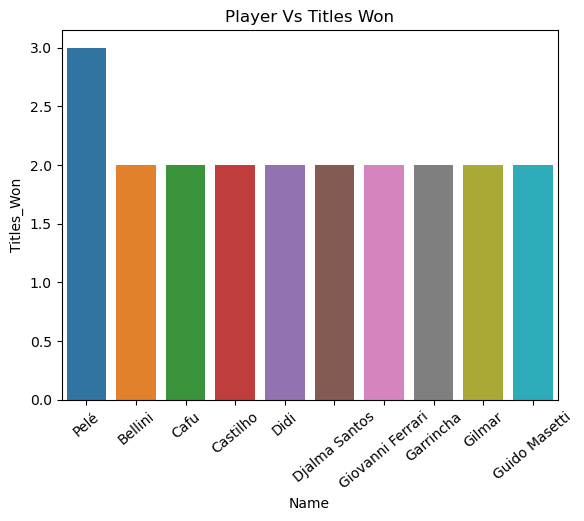

In [147]:
# Using sns, we create a bar plot
# By sayinh head(10), we get the first 10 data
plot1=sns.barplot(x=df2["Name"].head(10),y=df2["Titles_Won"].head(10),data=df2)
plt.title("Player Vs Titles Won")
# Since x ticks are put together without space, we rotating a bit for clear view
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=40);

C:\Users\Hanan Fouzer\AppData\Local\Temp\ipykernel_16820\3122242228.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(plot2.get_xticklabels(),rotation=40);


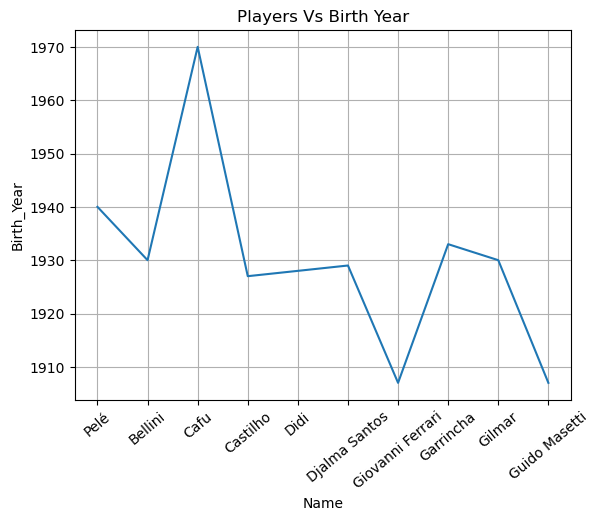

In [148]:
#12. Create a plot with x being top 10 players and y being their birth year

# We are taking data from df
# Using a lineplot as this includes datetime data
plot2=sns.lineplot(x=df["Name"].head(10),y=df["Birth_Year"].head(10),data=df)

# For better view
plt.title("Players Vs Birth Year")
plt.grid()
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=40);

In [ ]:
# Some conclusions:
# We can see the titles winners are with birth years from 1890s until 2000s
# Out of the 471 title winners, 305 are still alive
# From birth year=1980s onwards, there are only 98 title winners
# Majority of the title winners are born before 1980s
# 211 players who were born before 1980s are still alive out of 376 alive players